
# Frage 2 – Notebook 03: Plots

Dieses Notebook erzeugt:
- Balkenvergleich Online-Zahlungsarten 2019/2021/2023,
- Vergleich **Umfrage vs. Statista 2023** (nebeneinander, horizontal),
- Liniendiagramm stationäre Zahlungsarten (Bar, Girocard, Kreditkarte, Lastschrift),
- BNPL-Veränderung (gestapelte Balken).


## Pfade & Imports

In [1]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Projekt-Root & Ausgabeordner
project_root = Path("D:/JupyterProject")
out = project_root / "Frage2"
imgs = out / "Bilder"
imgs.mkdir(parents=True, exist_ok=True)

pd.set_option("display.width", 140)

online = pd.read_csv(out / "online_normalisiert.csv")
umf_methods = pd.read_csv(out / "umfrage_methods_norm.csv")
bnpl_counts = pd.read_csv(out / "umfrage_bnpl_counts.csv")
stationär = pd.read_csv(out / "stationaer_raw.csv")


## 1) Online 2019/2021/2023 – Gruppenbalken

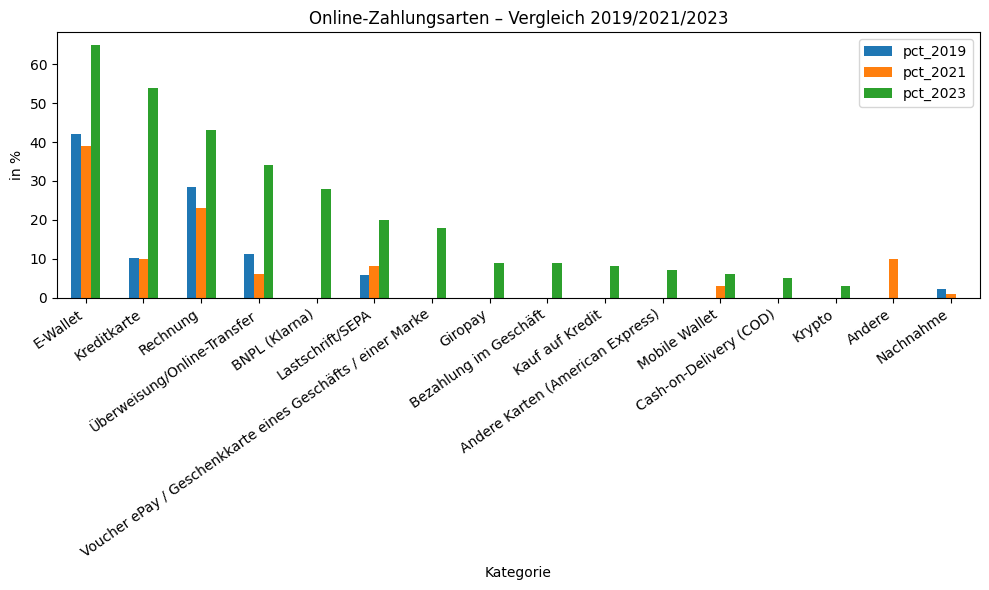

In [2]:

plotdf = online.fillna(0).sort_values("pct_2023", ascending=False)
ax = plotdf.plot(x="Kategorie", y=["pct_2019","pct_2021","pct_2023"], kind="bar", figsize=(10,6))
ax.set_ylabel("in %"); ax.set_title("Online-Zahlungsarten – Vergleich 2019/2021/2023")
plt.xticks(rotation=35, ha="right")
plt.tight_layout()
plt.savefig(imgs / "online_2019_2021_2023.png", dpi=300)
plt.show()


## 2) Vergleich Umfrage vs. Statista 2023 (horizontal)

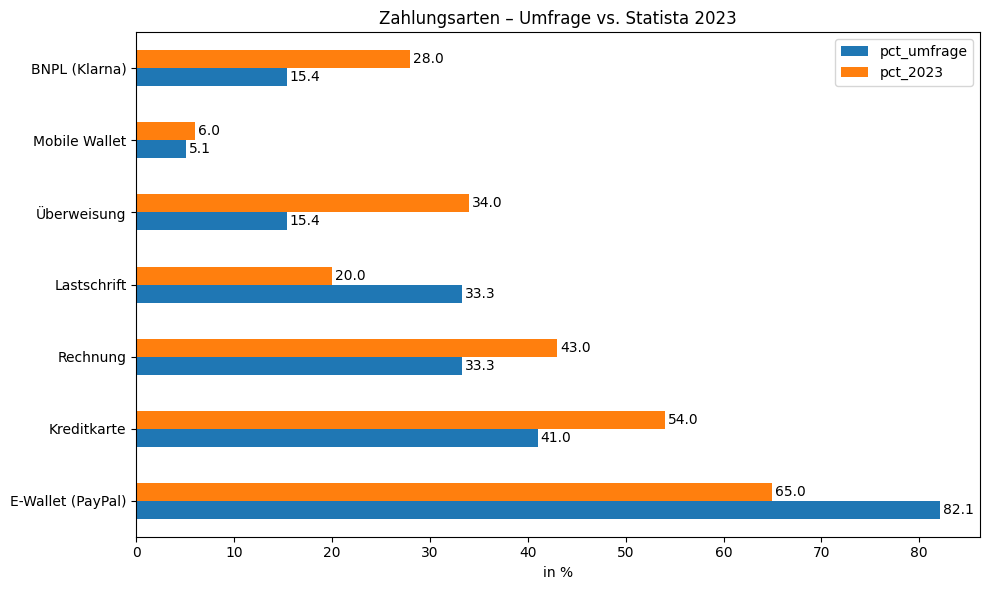

In [3]:

merged = umf_methods.set_index("Kategorie").join(online.set_index("Kategorie")[["pct_2023"]], how="outer").fillna(0)

# Kürzere Labels und Fokus-Kategorien (optional)
rename_short = {
    "Überweisung/Online-Transfer":"Überweisung",
    "Lastschrift/SEPA":"Lastschrift",
    "E-Wallet":"E-Wallet (PayPal)"
}
merged.index = merged.index.map(lambda s: rename_short.get(s, s))

focus = ["E-Wallet (PayPal)","Kreditkarte","Rechnung","Lastschrift","Überweisung","Mobile Wallet","BNPL (Klarna)"]
plot2 = merged.reindex(focus).fillna(0)

ax = plot2[["pct_umfrage","pct_2023"]].plot(kind="barh", figsize=(10,6))
ax.set_xlabel("in %"); ax.set_ylabel("")
ax.set_title("Zahlungsarten – Umfrage vs. Statista 2023")
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f", label_type="edge", padding=2)
plt.tight_layout()
plt.savefig(imgs / "umfrage_vs_statista_2023.png", dpi=300)
plt.show()


## 3) Stationär: Zeitreihe Bar/Girocard/Kreditkarte/Lastschrift

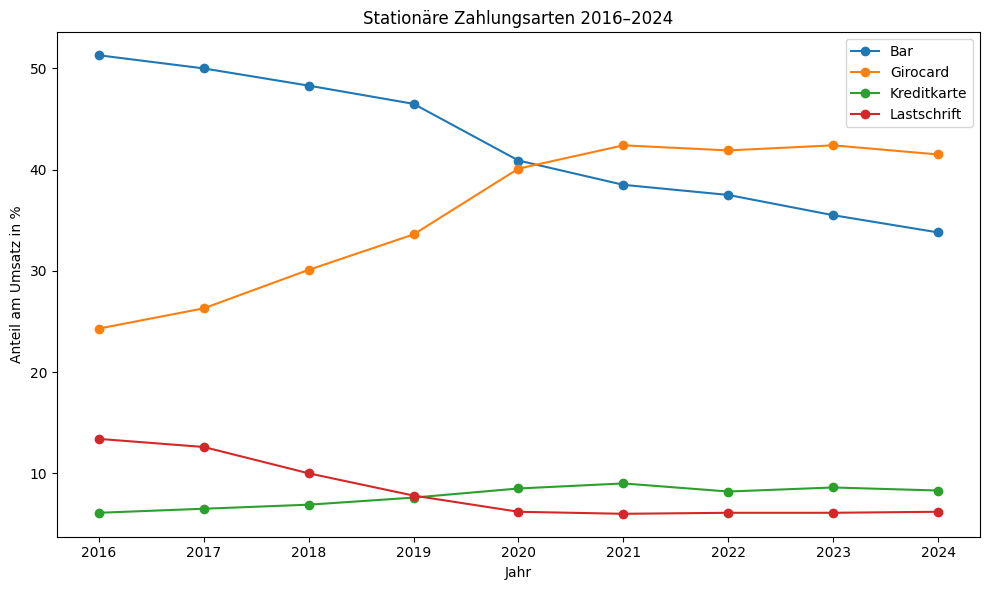

In [4]:

ax = stationär.plot(x="Jahr", y=["Bar","Girocard","Kreditkarte","Lastschrift"], marker="o", figsize=(10,6))
ax.set_ylabel("Anteil am Umsatz in %"); ax.set_title("Stationäre Zahlungsarten 2016–2024")
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig(imgs / "stationaer_zeitreihe.png", dpi=300)
plt.show()


## 4) BNPL-Veränderung (Umfrage)

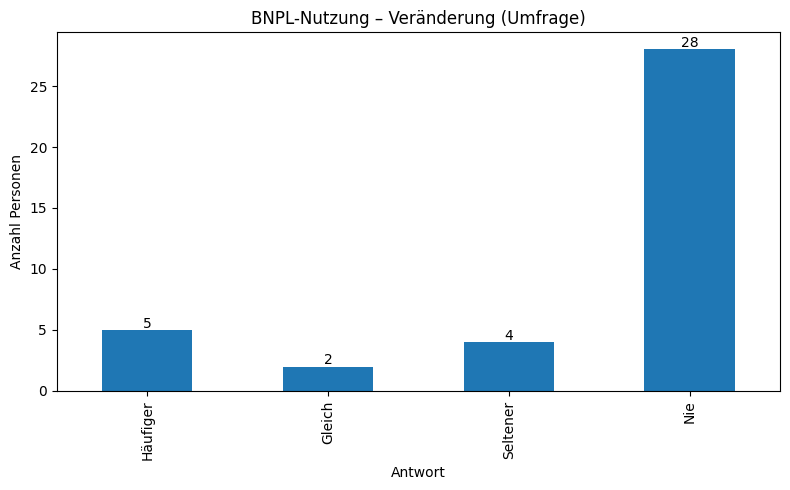

In [5]:

order = ["Häufiger","Gleich","Seltener","Nie"]
bnpl_plot = bnpl_counts.set_index("Antwort").reindex(order).fillna(0).reset_index()

ax = bnpl_plot.plot(x="Antwort", y="Anzahl", kind="bar", legend=False, figsize=(8,5))
for i, r in bnpl_plot.iterrows():
    ax.text(i, r["Anzahl"]+0.2, f"{int(r['Anzahl'])}", ha="center")
ax.set_ylabel("Anzahl Personen"); ax.set_title("BNPL-Nutzung – Veränderung (Umfrage)")
plt.tight_layout()
plt.savefig(imgs / "bnpl_veraenderung.png", dpi=300)
plt.show()
